In [ ]:
# Name- Manpreet Singh
# Student No- 300045244

### Import Libraries

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

### Load the dataset

In [63]:
# converted the dataset to csv using https://pulipulichen.github.io/jieba-js/weka/arff2csv/
data = pd.read_csv("csv_result-seismic-bumps.csv")
# dropping the id column as it got generated after converting to csv format
data.drop(['id'], axis = 1, inplace = True)
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


### Categorical Feature mapping

In [64]:
# mapping the 'seismic' feature to the dictionary
data['seismic_num'] = data['seismic'].map({
    'a': 0,
    'b': 1
})

# mapping the 'shift' feature to the dictionary
data['shift_num'] = data['shift'].map({
    'W': 0,
    'N': 1
})

# dropping the mapped columns
data.drop(['seismic', 'shift'], axis = 1, inplace = True)

# normalising 'seismoacoustic' feature
data_sctic = data.seismoacoustic
data_sctic = pd.get_dummies(data_sctic)
data = pd.concat([data, data_sctic], axis= 1)

data.columns = ['seismoacoustic', 'genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard',
       'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6',
       'nbumps7', 'nbumps89', 'energy', 'maxenergy', 'class', 'seismic_num',
       'shift_num', 'seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c']
# dropping the seismoacoustic feature as it is normalised
data.drop(['seismoacoustic'], axis = 1, inplace = True)

# normalising 'ghazard' feature
data_ghz = data.ghazard
data_ghz = pd.get_dummies(data_ghz)
data = pd.concat([data, data_ghz], axis= 1)

data.columns = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard', 'nbumps',
       'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7',
       'nbumps89', 'energy', 'maxenergy', 'class', 'seismic_num', 'shift_num',
       'seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c', 'ghazard_a', 'ghazard_b',
       'ghazard_c']
# dropping the ghazard feature as it is normalised
data.drop(['ghazard'], axis = 1, inplace = True)

In [ ]:
# class is imbalanced as class 0 has more instances
data['class'].value_counts()

### Data splitting and Normalization

In [68]:
# normalize data
# data = preprocessing.normalize(data)
y = data['class']
X = data.drop(['class'], axis = 1)
# scaling the values between the range 0 to 1
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train

### Part A : Q1 and Q2

In [ ]:
# a. oversampling using SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
np.bincount(y_train)

In [ ]:
# b. under-sampling using NearMiss
nm = NearMiss()
X_train, y_train = nm.fit_sample(X_train, y_train)
np.bincount(y_train)

In [7]:
# c. combined-sampling using SMOTEENN (Ref- https://imbalanced-learn.readthedocs.io/en/stable/combine.html)
combine = SMOTEENN(random_state=0)
X_train, y_train = combine.fit_sample(X_train, y_train)
np.bincount(y_train)

array([1427, 1658], dtype=int64)

In [ ]:
# type(X_train)
# X_train

In [ ]:
# converting back to dataframe if required
# X_train = pd.DataFrame(X_train, columns=X.columns)
# X_train.head()
# converting series to df
# y_df = y.to_frame()
# y_df
# y_train = pd.DataFrame(y_train, columns=y_df.columns)
# y_train.head()


### Classifiers

In [8]:
# cross validation (n=10)
cv_kfold = KFold(n_splits=10, random_state=None, shuffle=False)

In [9]:
# 1. Decision tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.90938511 0.88996764 0.91585761 0.89644013 0.86407767 0.9512987
 0.94805195 0.97727273 0.95454545 0.98051948]
Accuracy: 92.87%
[[408  83]
 [ 16  10]]
0.8085106382978723
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       491
           1       0.11      0.38      0.17        26

    accuracy                           0.81       517
   macro avg       0.53      0.61      0.53       517
weighted avg       0.92      0.81      0.86       517



In [10]:
# 2. Rule‐based learning
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.41747573 0.38187702 0.33656958 0.38511327 0.46925566 0.55519481
 0.50974026 0.44805195 0.4512987  0.45779221]
Accuracy: 44.12%
[[251 240]
 [ 14  12]]
0.5087040618955513
              precision    recall  f1-score   support

           0       0.95      0.51      0.66       491
           1       0.05      0.46      0.09        26

    accuracy                           0.51       517
   macro avg       0.50      0.49      0.38       517
weighted avg       0.90      0.51      0.63       517



In [11]:
# 3. Naïve Bayesian classifiers
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.81553398 0.80906149 0.84789644 0.84142395 0.79288026 0.6525974
 0.61038961 0.66558442 0.62012987 0.66233766]
Accuracy: 73.18%
[[393  98]
 [  7  19]]
0.7969052224371374
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       491
           1       0.16      0.73      0.27        26

    accuracy                           0.80       517
   macro avg       0.57      0.77      0.57       517
weighted avg       0.94      0.80      0.85       517



In [12]:
# 4. K-nearest neighbor classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.93851133 0.90938511 0.93203883 0.93203883 0.95469256 0.96753247
 0.99350649 0.98376623 0.99675325 0.99025974]
Accuracy: 95.98%
[[366 125]
 [ 14  12]]
0.7311411992263056
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       491
           1       0.09      0.46      0.15        26

    accuracy                           0.73       517
   macro avg       0.53      0.60      0.49       517
weighted avg       0.92      0.73      0.81       517



### Part A: Q5 

In [ ]:
# # apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features
X.shape

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.1537504  0.16451395 0.14323732 0.1402597  0.05164922 0.04806149
 0.04557487 0.01780609 0.00209696 0.         0.         0.
 0.08254596 0.07603679 0.01594658 0.01489276 0.01388041 0.01479039
 0.00447142 0.00383373 0.00579291 0.00085903]


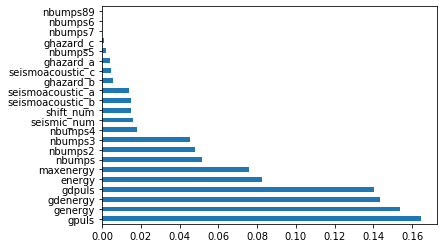

In [69]:
# Ref- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# The 2 different feature selection techniques are Correlation Matrix with Heatmap and Feature Importance
relation = ExtraTreesClassifier()
relation.fit(X,y)
# inbuilt class
print(relation.feature_importances_)
#plotting graph
features = pd.Series(relation.feature_importances_, index=X.columns)
features.nlargest(22).plot(kind='barh')
plt.show()

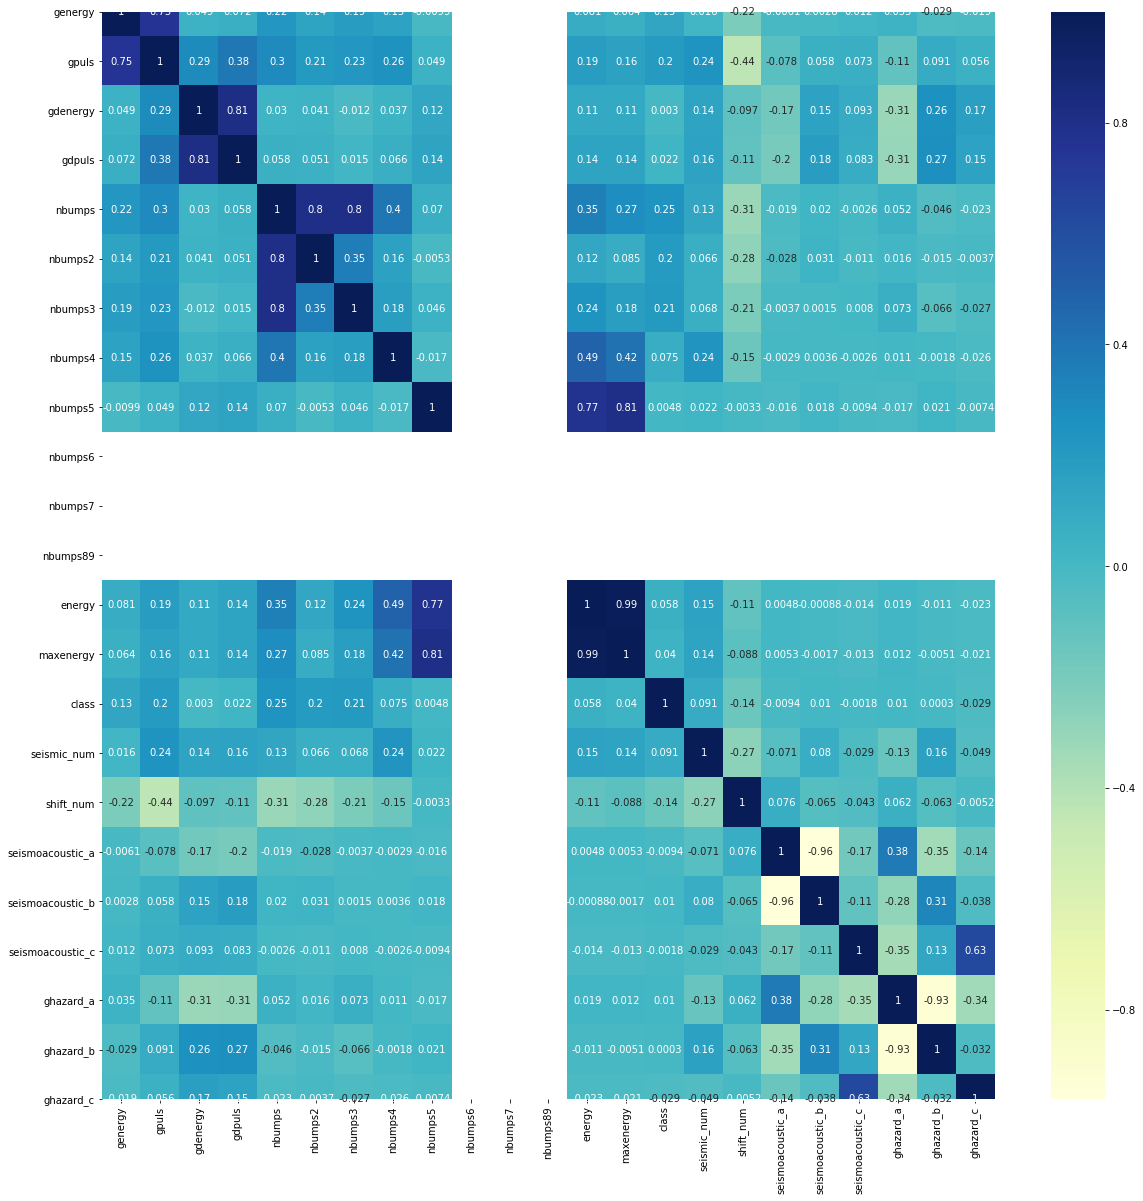

In [66]:
# The 2 different feature selection techniques are Correlation Matrix with Heatmap and Feature Importance
matrix = data.corr()
features = matrix.index
plt.figure(figsize=(20,20))
# plotting a heat map
heat_map = sb.heatmap(data[features].corr(),annot=True,cmap="YlGnBu")

In [5]:
# removing the features which are less important and have less correlation
del X['nbumps89']
del X['nbumps5']
del X['nbumps6']
del X['nbumps7']
del X['ghazard_c']
del X['seismoacoustic_c']
del X['ghazard_a']
del X['ghazard_b']

### Part B : Q1

### Load 1st dataset and Preprocessing

In [23]:
labor_data = pd.read_csv("labor-data.csv")
labor_test = pd.read_csv("labor-test.csv")
# concatenating both datasets
labor_data = pd.concat([labor_data, labor_test], ignore_index=True)
labor_data.shape

(57, 17)

In [24]:
# below has >= 50% '?' occurrences and the columns have been removed
# labor_data['wage_incr_3_yr'].value_counts()
# labor_data['pension'].value_counts()
# labor_data['standby_pay'].value_counts()
# labor_data['education_allowance'].value_counts()
# labor_data['longterm_disability_assist'].value_counts()
# labor_data['bereavement_assist'].value_counts()
# labor_data['contri_to_health'].value_counts()
# labor_data['shift_differential'].value_counts()
# labor_data['contri_to_dental'].value_counts()

# deleting the above mentioned features
del labor_data['wage_incr_3_yr']
del labor_data['pension']
del labor_data['standby_pay']
del labor_data['education_allowance']
del labor_data['longterm_disability_assist']
del labor_data['bereavement_assist']
del labor_data['contri_to_health']
del labor_data['shift_differential']
del labor_data['contri_to_dental']

In [25]:
# replacing ? with majority values
labor_data['wage_incr_1_yr'] = labor_data['wage_incr_1_yr'].replace('?', '2.0')
labor_data['wage_incr_2_yr'] = labor_data['wage_incr_2_yr'].replace('?', '4.0') # replaced by the average (3.91~4.0)
labor_data['cost_of_living'] = labor_data['cost_of_living'].replace('?', 'none')
labor_data['working_hours'] = labor_data['working_hours'].replace('?', '40')
labor_data['duration'] = labor_data['duration'].replace('?', '2')
labor_data['statutory_holidays'] = labor_data['statutory_holidays'].replace('?', '11')
labor_data['vacation'] = labor_data['vacation'].replace('?', 'below average')

In [26]:
# feature separation
y = labor_data['class']
X = labor_data.drop(['class'], axis = 1)

In [27]:
# encoding 'cost_of_living' feature
enc = OneHotEncoder()
tempX = enc.fit_transform(X.cost_of_living.values.reshape(-1,1)).toarray()
new_df = pd.DataFrame(tempX, columns = ['livingCost_none', 'livingCost_tcf', 'livingCost_tc'])
X = pd.concat([X, new_df], axis=1)
del X['cost_of_living']
X.head()

,duration,wage_incr_1_yr,wage_incr_2_yr,working_hours,statutory_holidays,vacation,livingCost_none,livingCost_tcf,livingCost_tc
0,1,5.0,4.0,40,11,average,1.0,0.0,0.0
1,2,4.5,5.8,35,11,below average,1.0,0.0,0.0
2,2,2.0,4.0,38,11,generous,1.0,0.0,0.0
3,3,3.7,4.0,40,11,below average,0.0,1.0,0.0
4,3,4.5,4.5,40,12,average,1.0,0.0,0.0


In [28]:
# encoding 'cost_of_living' feature
enc = OneHotEncoder()
tempX = enc.fit_transform(X.vacation.values.reshape(-1,1)).toarray()
new_df = pd.DataFrame(tempX, columns = ['vacation_avg', 'vacation_ba', 'vacation_gnr'])
X = pd.concat([X, new_df], axis=1)
del X['vacation']
X.head()

,duration,wage_incr_1_yr,wage_incr_2_yr,working_hours,statutory_holidays,livingCost_none,livingCost_tcf,livingCost_tc,vacation_avg,vacation_ba,vacation_gnr
0,1,5.0,4.0,40,11,1.0,0.0,0.0,1.0,0.0,0.0
1,2,4.5,5.8,35,11,1.0,0.0,0.0,0.0,1.0,0.0
2,2,2.0,4.0,38,11,1.0,0.0,0.0,0.0,0.0,1.0
3,3,3.7,4.0,40,11,0.0,1.0,0.0,0.0,1.0,0.0
4,3,4.5,4.5,40,12,1.0,0.0,0.0,1.0,0.0,0.0


### Load 2nd dataset and Preprocessing

In [43]:
iris_data = pd.read_csv("iris.csv")
# target variable in temp
temp = iris_data['class']

In [44]:
# encoding the target class
enc = LabelEncoder()
enc.fit(temp)
newTemp = enc.transform(temp)
# dummy contains encoded target class
# dummy = np_utils.to_categorical(newTemp)

In [45]:
# feature separation
y = newTemp
X = iris_data.drop(['class'], axis = 1)

### Load 3rd dataset and Preprocessing

In [52]:
congress_data = pd.read_csv("house-votes.csv")
congress_data.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_budget,physician_fee,el_salvador,religious_groups,anti_satellite_test,aid_to_nicaraguan,mx_missile,immigration,synfuels,education_spending,superfund,crime,exports,export_act
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [53]:
# removing the rows containing '?'
congress_data = congress_data[congress_data.handicapped_infants != '?']
congress_data = congress_data[congress_data.water_project_cost_sharing != '?']
congress_data = congress_data[congress_data.adoption_of_budget != '?']
congress_data = congress_data[congress_data.physician_fee != '?']
congress_data = congress_data[congress_data.el_salvador != '?']
congress_data = congress_data[congress_data.anti_satellite_test != '?']
congress_data = congress_data[congress_data.aid_to_nicaraguan != '?']
congress_data = congress_data[congress_data.mx_missile != '?']
congress_data = congress_data[congress_data.immigration != '?']
congress_data = congress_data[congress_data.superfund != '?']


# removing below features
del congress_data['religious_groups']
del congress_data['synfuels']
del congress_data['education_spending']
del congress_data['crime']
del congress_data['exports']
del congress_data['export_act']

In [54]:
# mapping the target feature
congress_data['class_name'] = congress_data['class_name'].map({
    'republican': 0,
    'democrat': 1
})
# feature separation
y = congress_data['class_name']
X = congress_data.drop(['class_name'], axis = 1)

In [55]:
# mapping X to numeric values
for col in X.columns:
    X[col] = X[col].map({'y': 1, 'n': 0})

### Classifiers

In [58]:
# cross validation (n=10)
cv_kfold = KFold(n_splits=10, random_state=None, shuffle=False)

In [59]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# 1. Decision tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

Accuracy: 96.44%
[[37  5]
 [ 0 55]]
0.9484536082474226
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.92      1.00      0.96        55

    accuracy                           0.95        97
   macro avg       0.96      0.94      0.95        97
weighted avg       0.95      0.95      0.95        97



In [60]:
# 2. Rule‐based learning
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

Accuracy: 52.00%
[[18 24]
 [23 32]]
0.5154639175257731
              precision    recall  f1-score   support

           0       0.44      0.43      0.43        42
           1       0.57      0.58      0.58        55

    accuracy                           0.52        97
   macro avg       0.51      0.51      0.51        97
weighted avg       0.51      0.52      0.51        97



In [61]:
# 3. Naïve Bayesian classifiers
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

Accuracy: 95.12%
[[40  2]
 [ 1 54]]
0.9690721649484536
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.96      0.98      0.97        55

    accuracy                           0.97        97
   macro avg       0.97      0.97      0.97        97
weighted avg       0.97      0.97      0.97        97



In [62]:
# 4. K-nearest neighbor classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

Accuracy: 92.00%
[[40  2]
 [ 5 50]]
0.9278350515463918
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.96      0.91      0.93        55

    accuracy                           0.93        97
   macro avg       0.93      0.93      0.93        97
weighted avg       0.93      0.93      0.93        97

